# MLR in cryptocurrency pricing analysis: Final report

In [4]:
library(broom)
install.packages("latex2exp")
library(latex2exp)
library(tidyverse)
library(repr)
library(digest)
library(gridExtra)
install.packages("scatterplot3d")
library(scatterplot3d)
library(gridExtra)
library(leaps)
library(GGally)
library(car)
library(mltools)
library(glmnet)

options(warn = -1)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some



Attaching package: ‘mltools’


The following object is masked from ‘packa

![alt text](https://ethereum.org/static/28214bb68eb5445dcb063a72535bc90c/f3583/hero.png)

## Introduction
----

### Background
Cryptocurrency is a decentralized "purely peer-to-peer version of electronic cash" (Nakamoto, 2009). ETH (Ether) is one of the native cryptocurrencies designed for the Ethereum platform (Buterin, n.d.). As the second cryptocurrency only to Bitcoin in market capitalization, ETH has a tenfold price increase in one year since November, 2020 ([Yahoo finance](https://finance.yahoo.com/quote/ETH-USD/)). The surging value of cryptocurrencies raises studies with computational tools for price prediction.
### Purpose
This study will apply MLR and assessment / selection methods on the ETH dataset, aiming to build an optimized model that explains the linearity between the same-day inputs and the price at the next day.
### Dataset

In [5]:
eth <- read_csv('https://raw.githubusercontent.com/gzzen/stat-301-group-project/main/eth_dataset.csv')%>%na.omit()
head(eth, 2)
tail(eth, 2)

Rows: 493 Columns: 47

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (46): reddit_index, block_size, mining_difficulty, ethe_open_interest, ...
date  (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



date,reddit_index,block_size,mining_difficulty,ethe_open_interest,activate_address,on_chain_transaction_vol,unit_computing_income,daily_block_reward,block_gen_rate,⋯,trade_vol_l,trade_vol_x,short,long,ethe_otc_premium,block_count,avg_computing_power,transaction_vol,supply,reddit_follower_growth_rate
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-06-24,2004.993,38301.08,2.405277e+15,1702398,566754,5530577,0.0202,3723607,13.4,⋯,0,0,141651691,137850993,3.5046,6450,1.916233e+14,1042273,108818350,0.086374
2020-06-25,2035.980,35299.83,2.406899e+15,1702281,584713,2795780,0.0197,3632507,13.4,⋯,0,0,128435656,115084909,3.0171,6448,1.915031e+14,1017408,108831273,0.101543


date,reddit_index,block_size,mining_difficulty,ethe_open_interest,activate_address,on_chain_transaction_vol,unit_computing_income,daily_block_reward,block_gen_rate,⋯,trade_vol_l,trade_vol_x,short,long,ethe_otc_premium,block_count,avg_computing_power,transaction_vol,supply,reddit_follower_growth_rate
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-10-28,254.6987,64129.10,1.006534e+16,3128001,826217,2972658,0.0858,63507365,13.6,⋯,180195352,152798432,4755173026,4677848018,-0.0289822,6368,7.842797e+14,1456333,115181507,0.455180
2021-10-29,264.5458,62412.12,1.023876e+16,3128001,765907,1313643,0.0835,65172687,13.6,⋯,102822580,41716992,2839980504,2612652448,-0.0289822,6345,7.986090e+14,1379095,115194221,0.391936


The raw data is pulled from [qkl123](https://www.qkl123.com/project/eth/data) that consists a comprehensive collection of featured indicators for ETH. The semi-finished dataset `eth_data` is then hand-crafted by merging columns with Python ([detailed process](https://github.com/gzzen/stat-301-group-project/blob/main/proposal/dataset/merge_dataset.ipynb)). Below we roughly peek at columns of the data. 

In [6]:
cat('Total number of columns: ', ncol(eth))
colnames(eth)

Total number of columns:  47

[1] "date"                        "reddit_index"               
 [3] "block_size"                  "mining_difficulty"          
 [5] "ethe_open_interest"          "activate_address"           
 [7] "on_chain_transaction_vol"    "unit_computing_income"      
 [9] "daily_block_reward"          "block_gen_rate"             
[11] "price"                       "open_interest_top100"       
[13] "open_interest_top50"         "open_interest_top30"        
[15] "open_interest_top10"         "avg_gas_cost"               
[17] "unit_transaction_fee"        "mining_vol"                 
[19] "margin_call_s"               "margin_call_m"              
[21] "margin_call_l"               "margin_call_x"              
[23] "short_margin_call"           "long_margin_call"           
[25] "new_addresses"               "open_interest"              
[27] "business_vol"                "interest"                   
[29] "basis"                       "inflow_maker"               
[31] "outflow_maker"               "inflow_retail"              
[33] "outflow_retail"              "net"                        
[35] "daily_uncle_block_reward"    "trade_vol_s"                
[37] "trade_vol_m"                 "trade_vol_l"                
[39] "trade_vol_x"                 "short"                      
[41] "long"                        "ethe_otc_premium"           
[43] "block_count"                 "avg_computing_power"        
[45] "transaction_vol"             "supply"                     
[47] "reddit_follower_growth_rate"

The composition of dataset includes 47 columns spreading across 5 categories:
- `price` and `date` are the most basic figures in trading.
- `block_size`, `mining_difficulty`, etc. consists information of the blockchain.
- `business_vol`, `outflow_retail`, etc. are indicators in the spot market.
- `long_margin_call`, `margin_call_l`, etc. are indicators in the future market.
- `reddit_index`, `ethe_otc_premium`, etc. have no specific attributes, but are interesting to consider.

And we will further explain some of the variables after we reduce redundancy in the dataset.

## Preliminary Results

### Cleaning and wrangling

Now that we have our raw dataset ready, we can derive our target response: **next day's ETH price**, by moving our `price` column one unit upward. THis gives our new column `TARGET_price_nextday`.

In [7]:
# switch the next-day price as the response variable of the same-day variables
price_temp = pull(eth, price)
TARGET_price_nextday <- price_temp[-1]
# we delete the first row of target because we don't have the explanatory variables from previous day
eth_data <- eth[-484,]
# we delete the last row because we don't have the actual target variable of the latest day, we'll have to wait till monday!

In [8]:
# merge the operation with original dataset
eth_data <- cbind(eth_data, TARGET_price_nextday)
head(eth_data, 2)
tail(eth_data, 2)

,date,reddit_index,block_size,mining_difficulty,ethe_open_interest,activate_address,on_chain_transaction_vol,unit_computing_income,daily_block_reward,block_gen_rate,⋯,trade_vol_x,short,long,ethe_otc_premium,block_count,avg_computing_power,transaction_vol,supply,reddit_follower_growth_rate,TARGET_price_nextday
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-06-24,2004.993,38301.08,2.405277e+15,1702398,566754,5530577,0.0202,3723607,13.4,⋯,0,141651691,137850993,3.5046,6450,1.916233e+14,1042273,108818350,0.086374,229.5401
2,2020-06-25,2035.980,35299.83,2.406899e+15,1702281,584713,2795780,0.0197,3632507,13.4,⋯,0,128435656,115084909,3.0171,6448,1.915031e+14,1017408,108831273,0.101543,227.2679


,date,reddit_index,block_size,mining_difficulty,ethe_open_interest,activate_address,on_chain_transaction_vol,unit_computing_income,daily_block_reward,block_gen_rate,⋯,trade_vol_x,short,long,ethe_otc_premium,block_count,avg_computing_power,transaction_vol,supply,reddit_follower_growth_rate,TARGET_price_nextday
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
482,2021-10-27,272.2137,67421.64,1.000351e+16,3128215,812670,1804725,0.0830,59779364,13.5,⋯,88796720,3930069648,3823507926,-0.0205612,6408,7.821472e+14,1510502,115168748,0.37011,4452.810
483,2021-10-28,254.6987,64129.10,1.006534e+16,3128001,826217,2972658,0.0858,63507365,13.6,⋯,152798432,4755173026,4677848018,-0.0289822,6368,7.842797e+14,1456333,115181507,0.45518,4290.951


We now have:  
- `TARGET_price_nextday` as our **response variable**, and 46 variables as inputs to choose from (excluding date).

### Association between explanotory variables and response

To assure the viability of this model, we want to check that the collected data of the previous day are indeed associated with our targeted response, to do that, we first use`cor()` to test the correlation between our explanotory variables and response.

> Also notice: right now `TARGET_price_nextday` is also in the correlation chart, we need to get rid of that since it's the response we're looking for.

In [9]:
# create correlation chart 
eth_target_cor_chart <- data.frame(cor(eth_data[-1])) %>%
    select(TARGET_price_nextday)

# order the rows by correlation
colnames(eth_target_cor_chart) <- c('correlation')
correlation_data <- 
    eth_target_cor_chart %>% 
    arrange(desc(correlation)) %>% 
    filter(correlation != 1)

correlation_data
correlation_data

,correlation
,<dbl>
price,0.995615100
daily_uncle_block_reward,0.983602757
avg_computing_power,0.970871268
mining_difficulty,0.969811982
inflow_maker,0.937307490
supply,0.931362926
open_interest,0.910698500
open_interest_top100,0.908011519
open_interest_top50,0.902128868


,correlation
,<dbl>
price,0.995615100
daily_uncle_block_reward,0.983602757
avg_computing_power,0.970871268
mining_difficulty,0.969811982
inflow_maker,0.937307490
supply,0.931362926
open_interest,0.910698500
open_interest_top100,0.908011519
open_interest_top50,0.902128868


We are gladly surprised that the (absolute values of) correlations between a few explanotary variables and the response is very high. We can visualize all the correlations using a simple plot.

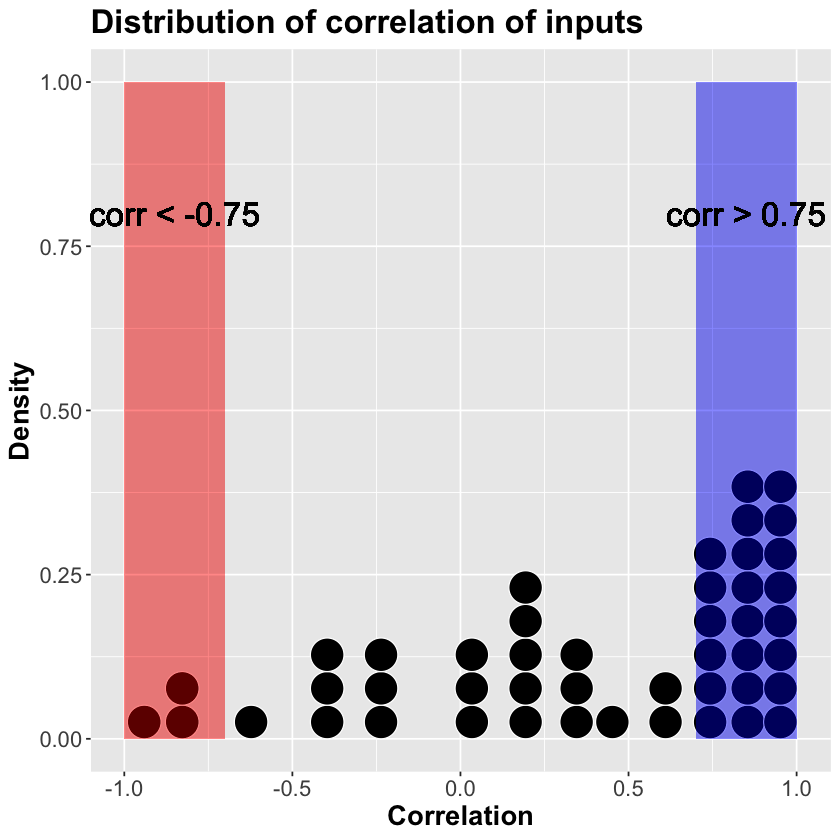

In [10]:
# visualize correlation of inputs with the next-day price
eth_cor_histogram <- 
    correlation_data %>%
    ggplot(aes(x=correlation)) +
    geom_dotplot(binwidth=1/10, color='white')  +
    geom_rect(aes(xmin=-1, xmax=-0.7, ymin=0, ymax=1), fill='red', alpha=0.01) +
    geom_rect(aes(xmin=0.7, xmax=1, ymin=0, ymax=1), fill='blue', alpha=0.01) +
    geom_text(x=-0.85, y=0.8, label='corr < -0.75', size=7) +
    geom_text(x=0.85, y=0.8, label='corr > 0.75', size=7) +
    labs(x='Correlation', y='Density', title='Distribution of correlation of inputs') +
    theme(
        text = element_text(size = 16.5),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold"))

eth_cor_histogram

Although there's no absolute standard, a correlation $corr>0.75$ or $corr<-0.75$ is usually considered strong. We can see here that quite a few variables meet those requirements in our plot, described by the red and blue region.

### SLR and MLR model

`geom_smooth()` using formula 'y ~ x'



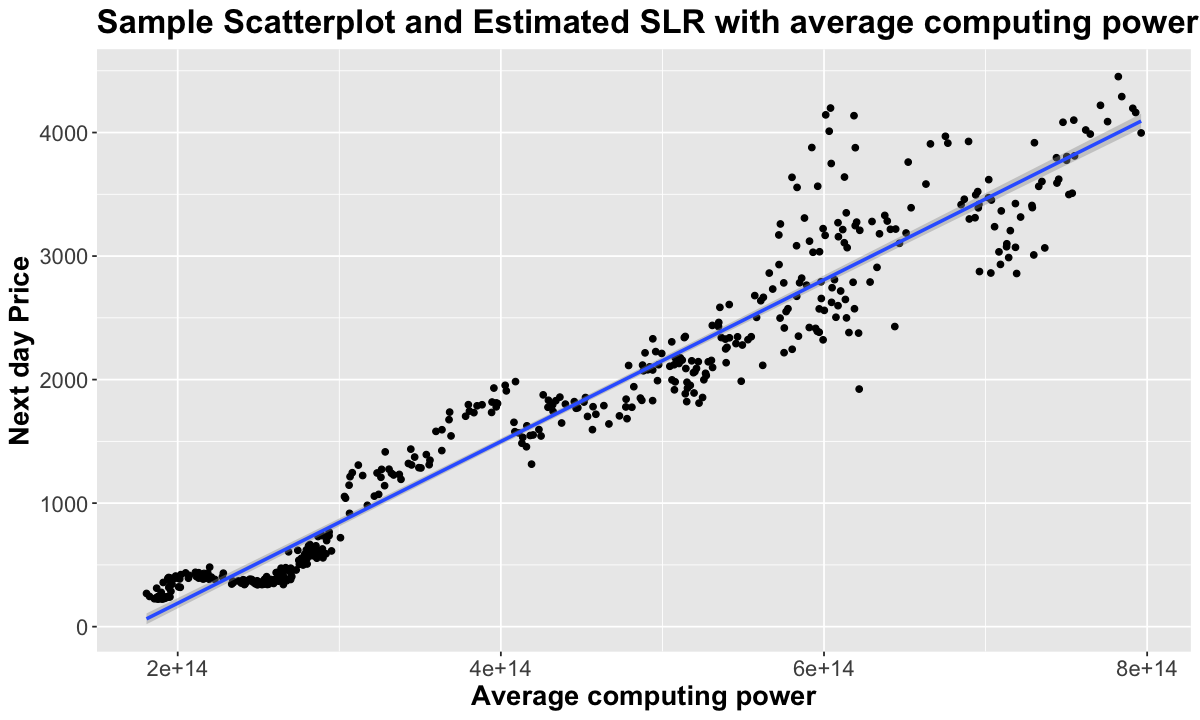

In [11]:
options(repr.plot.width = 10, repr.plot.height = 6)

eth_sample_plot<- eth_data %>%
    ggplot(aes(x = avg_computing_power, y = TARGET_price_nextday))+
    geom_point()+
    geom_smooth(aes(x = avg_computing_power, y = TARGET_price_nextday),method = "lm")+
    xlab("Average computing power") +
    ylab("Next day Price") +
    ggtitle("Sample Scatterplot and Estimated SLR with average computing power") +
    theme(
        text = element_text(size = 16.5),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    )

eth_sample_plot

Our plot seems promising already with only one variable. However, notice that as we're targeting at price here, we'd want our prediction to have a relatively small confidence interval so that it wouldn't contain previous day's price too often (in that case our prediction of ETH's gain/loss rate would be inconclusive). That's why we still need to put more variables into consider when conducting the model.

Below we include `reddit_index` and `on_chain_transaction_vol` to construct a two-variable MLR model, as to check how that fits in a 3-dimension coordinate.

In [12]:
# MLR model
MLR_add_sample <- lm(TARGET_price_nextday~reddit_index+on_chain_transaction_vol, data=eth_data)

tidy(MLR_add_sample, conf.int=TRUE) %>% mutate_if(is.numeric, round, 2)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3655.05,87.51,41.77,0,3483.1,3827.00
reddit_index,-1.98,0.06,-32.59,0,-2.1,-1.86
on_chain_transaction_vol,0.00,0.00,-7.67,0,0.0,0.00


In [13]:
# predicted regression plane
axis_x <- seq(min(eth_data$reddit_index), max(eth_data$reddit_index), length=483)
axis_y <- seq(min(eth_data$block_size), max(eth_data$block_size), length=483)

petal_lm_surface <- expand.grid(reddit_index=axis_x, block_size=axis_y, KEEP.OUT.ATTRS=F)
petal_lm_surface$TARGET_price_nextday <- predict(MLR_add_sample)

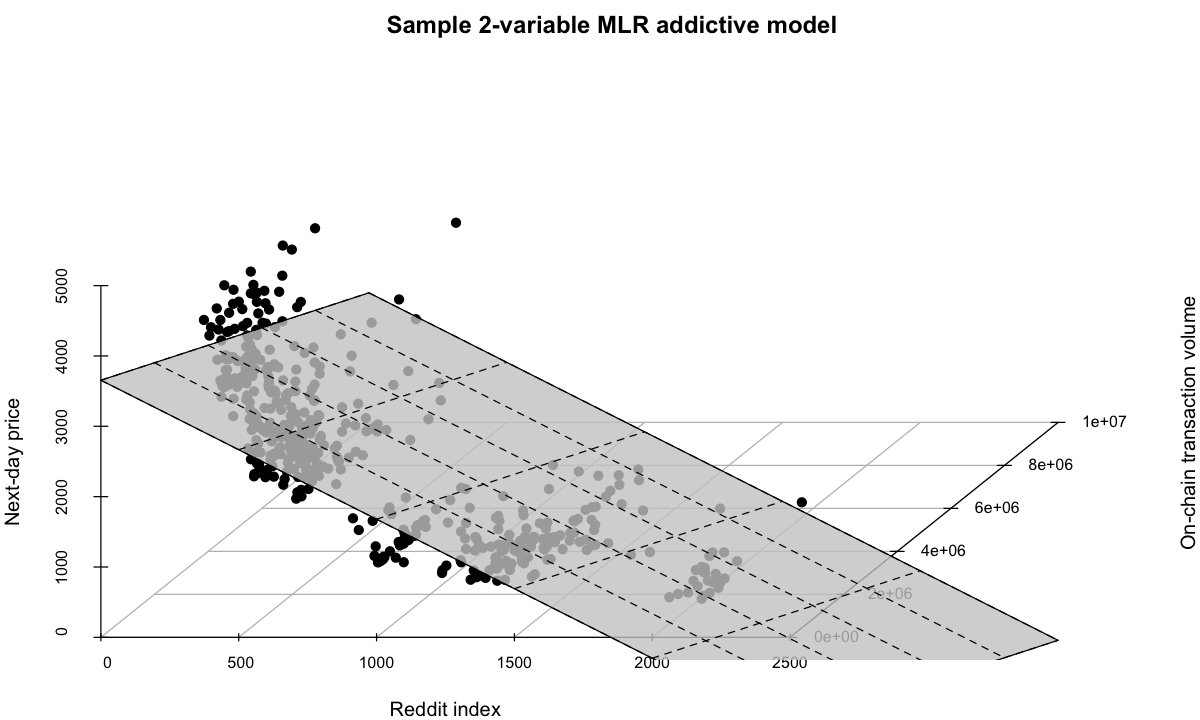

In [14]:
# scatterplot
s3d <- scatterplot3d(x=eth_data$reddit_index, y=eth_data$on_chain_transaction_vol, z=TARGET_price_nextday, pch=19, type="p", color="black",
                     main="Sample 2-variable MLR addictive model", grid = TRUE, box = FALSE,  
                     mar = c(2.5, 2.5, 2, 1.5), angle = 55, xlab='Reddit index', ylab='On-chain transaction volume', zlab='Next-day price')

s3d$plane3d(MLR_add_sample, draw_polygon = TRUE, draw_lines = TRUE, polygon_args = list(col = rgb(0.8,0.8,0.8,0.8)))

Note that most observations lies under the regression plane. The inequal distribution of scatters possibly implies that the association is non-linear, and the MLR model we just constructed may not be the best fit of our dataset. 

## Method

#### What methods do you plan on using?  
- We plan on using a multiple linear regression model to predict our response variable, i.e. ETH's next-day price.  
  
- Since our dataset contains 47 explanotory variables to choose from, we will split our dataset into training and testing data, and use forward/backward/LASOO selection in building our model.  
  
- This allows us to filter out variables in order to find the minimal size of subset that leads to an optimal predictive model for our response variable, next-day's price. We'll then use cross-validation to choose the model that fits our sample the best.
  
- This includes eliminating potential biases by identifying multicollinearity and confounding variables that may be present.  
  

#### What do you expect to achieve?
We expect to build a multiple linear regression model that is capable of accurately and percisely predicting the next-day's price of the cryptocurrency ETH.  

#### What impact could your results have?  
We want to see if such a model would be a relatively good prediction of ETH's trend in short term, and:  
- If it turns out to be trust-worthy in the short term, would it hold up in the long-term?  
- If we found that the model isn't a good prediction for ETH, would there be a better model to use in this case rather than multi-variable linear regression?
- If this model works well, would it be applicable to other crypto-currencies?

  

In [114]:
eth_data <- eth_data%>%
    na.omit()%>%
    select(-date)

ERROR: Error: Can't subset columns that don't exist.
[31m✖[39m Column `date` doesn't exist.


## Methods and results
-----
### Splitting training set and testing set
- The dependency in dataset we used for model construction and inference may result in significant errors. Therefore we need to split our original dataset into training set `training_eth` and testing set `testing_eth`.
- As a rule of thumb, we use the $75:25$ split.


In [118]:
set.seed(2022)

eth_data$ID <- 1:nrow(eth_data)

training_eth <- sample_n(eth_data, size = nrow(eth_data) * 0.75,
  replace = FALSE
)

testing_eth <- anti_join(eth_data,
  training_eth,
  by = "ID"
)

training_eth <- training_eth %>% select(-ID)
testing_eth <- testing_eth %>% select(-ID)


head(training_eth, 2)
cat('Number of rows in the training set:', nrow(training_eth))

head(testing_eth, 2)
cat('Number of rows in the testing set:', nrow(testing_eth))

,reddit_index,block_size,mining_difficulty,ethe_open_interest,activate_address,on_chain_transaction_vol,unit_computing_income,daily_block_reward,block_gen_rate,price,⋯,trade_vol_x,short,long,ethe_otc_premium,block_count,avg_computing_power,transaction_vol,supply,reddit_follower_growth_rate,TARGET_price_nextday
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,377.0566,44282.38,4.807885e+15,3073624,704629,3571784,0.1420,53119590,13.2,1703.514,⋯,11504877,3122619317,2859451399,0.05132450,6528,3.798881e+14,1320188,111810837,12.982277,1797.081
2,310.4977,72676.21,8.775114e+15,3138732,591729,2446108,0.0864,56925176,13.5,3522.036,⋯,27235877,3618119908,3538424099,-0.05423729,6416,6.899260e+14,1206687,114539775,0.449185,3300.350


Number of rows in the training set: 362

,reddit_index,block_size,mining_difficulty,ethe_open_interest,activate_address,on_chain_transaction_vol,unit_computing_income,daily_block_reward,block_gen_rate,price,⋯,trade_vol_x,short,long,ethe_otc_premium,block_count,avg_computing_power,transaction_vol,supply,reddit_follower_growth_rate,TARGET_price_nextday
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2035.980,35299.83,2.406899e+15,1702281,584713,2795780,0.0197,3632507,13.4,229.5401,⋯,0,128435656,115084909,3.0171,6448,1.915031e+14,1017408,108831273,0.101543,227.2679
2,2064.528,35930.52,2.382837e+15,1701466,362086,1775379,0.0200,3625312,13.3,226.8053,⋯,0,76592950,74564600,3.7910,6475,1.903986e+14,1021995,108921633,0.112856,226.3398


Number of rows in the testing set: 121

### Selecting the optimum model
- At this stage, we first use different selection methods to obtain most efficient combination of inputs at `training_eth`. The methods includes:
    - Full MLR addiction model
    - Forward selection with minimal $C_p$
    - Backward selection with minimal $C_p$
    - LASSO with minimal MSE
- Then we construct a MLR model for each set of selected input variables, and use the model to predict at `testing_eth`.
- Finally, we compares the RMSE of the predicted results from each model with respect to the actuals, and choose the one with smallest RMSE as the most suitable model.

#### 1. Full MLR addiction model

In [119]:
MLR_FAM <- lm(TARGET_price_nextday~., data=training_eth)
head(tidy(MLR_FAM, conf.int = TRUE))
cat('Number of coefficients:', nrow(tidy(MLR_FAM)))

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-2.471445e+03,8.002201e+03,-0.3088456,0.7576411994,-1.821539e+04,1.327250e+04
reddit_index,-8.278118e-02,8.462071e-02,-0.9782615,0.3286886272,-2.492684e-01,8.370600e-02
block_size,2.724470e-03,1.765211e-03,1.5434247,0.1237222838,-7.484975e-04,6.197438e-03
mining_difficulty,6.222543e-13,3.213909e-13,1.9361288,0.0537378606,-1.006696e-14,1.254576e-12
ethe_open_interest,-1.469747e-04,9.611458e-05,-1.5291611,0.1272185960,-3.360755e-04,4.212614e-05
activate_address,6.054705e-04,1.587857e-04,3.8131290,0.0001647999,2.930672e-04,9.178738e-04


Number of coefficients: 47

In [108]:
# predict using testing set
full_add_pred <- predict(MLR_FAM, testing_eth)

#### 2. Forward selection

In [57]:
eth_MLR_forward_sel <- regsubsets(
   x = TARGET_price_nextday~.,
   data = training_eth, 
    nvmax = 43, 
    method = "forward",
 )

fwd_summary <- summary(eth_MLR_forward_sel)

Reordering variables and trying again:


In [63]:
cat('Selection # with minimum C_p:', which.min(fwd_summary$cp))

Selection # with minimum C_p: 18

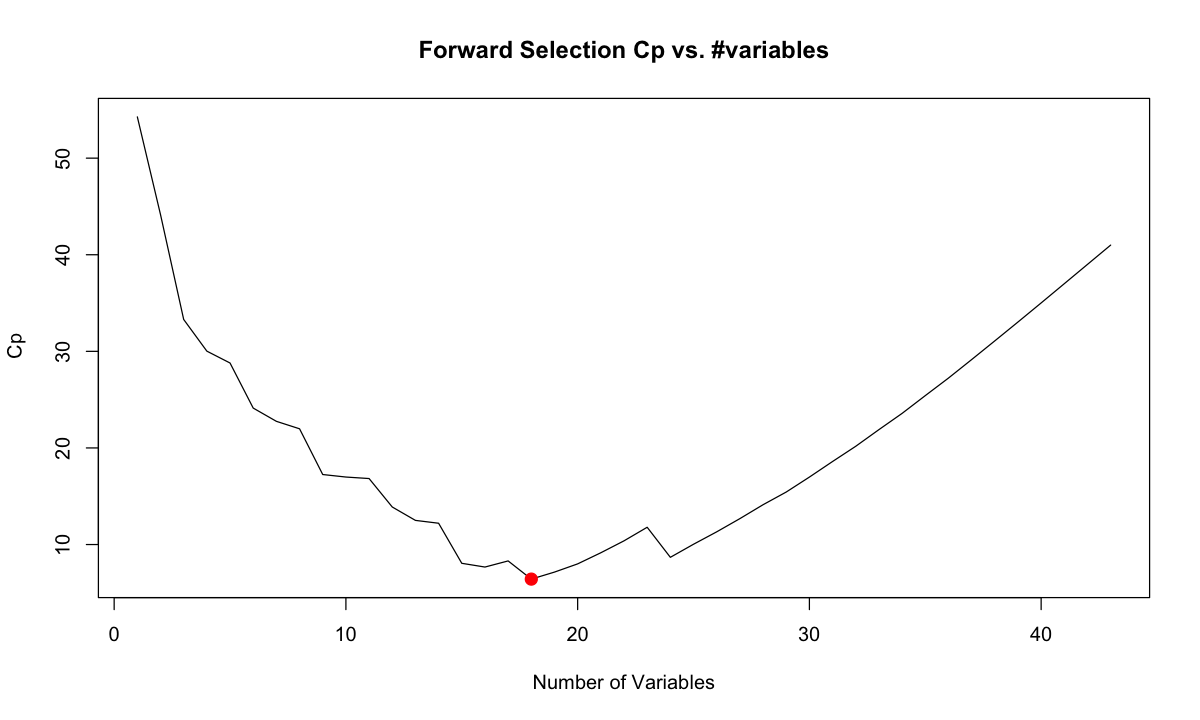

In [69]:
plot(
    fwd_summary$cp ,
    xlab =" Number of Variables ", 
    ylab =" Cp",
    type="l",
    main = "Forward Selection Cp vs. #variables")
points (18, fwd_summary$cp [18] , col ="red", cex =2, pch =20)

In [64]:
fwd_summary

Subset selection object
Call: regsubsets.formula(x = TARGET_price_nextday ~ ., data = training_eth, 
    nvmax = 43, method = "forward", )
46 Variables  (and intercept)
                            Forced in Forced out
reddit_index                    FALSE      FALSE
block_size                      FALSE      FALSE
mining_difficulty               FALSE      FALSE
ethe_open_interest              FALSE      FALSE
activate_address                FALSE      FALSE
on_chain_transaction_vol        FALSE      FALSE
unit_computing_income           FALSE      FALSE
daily_block_reward              FALSE      FALSE
block_gen_rate                  FALSE      FALSE
price                           FALSE      FALSE
open_interest_top100            FALSE      FALSE
open_interest_top50             FALSE      FALSE
open_interest_top30             FALSE      FALSE
open_interest_top10             FALSE      FALSE
avg_gas_cost                    FALSE      FALSE
unit_transaction_fee            FALSE      FALS

In [80]:
lm_fwd <- lm(
    formula = TARGET_price_nextday ~ 
        block_size + activate_address + unit_computing_income +
        daily_block_reward + price + open_interest_top100 +
        margin_call_l + margin_call_x + new_addresses + 
        outflow_maker + daily_uncle_block_reward + 
        trade_vol_s + trade_vol_m + avg_computing_power + transaction_vol + reddit_follower_growth_rate,
    data = training_eth)

tidy(lm_fwd, conf.int = TRUE) %>% head(3)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-1.861484e+01,3.243708e+02,-0.05738753,9.542697e-01,-6.566081e+02,6.193784e+02
block_size,3.831828e-03,1.072921e-03,3.57139855,4.054995e-04,1.721539e-03,5.942117e-03
activate_address,4.712642e-04,1.176046e-04,4.00719082,7.531324e-05,2.399519e-04,7.025765e-04


In [85]:
lm_fwd_pred <- predict(lm_fwd, testing_eth)

#### 3. Backward selection

In [66]:
eth_MLR_backward_sel <- regsubsets(
   x = TARGET_price_nextday~.,
   data = training_eth, 
    nvmax = 49, 
    method = "backward",
 )

bwd_summary <- summary(eth_MLR_backward_sel)

Reordering variables and trying again:


Forward selection gives the best fitting model when selecting 23 variables

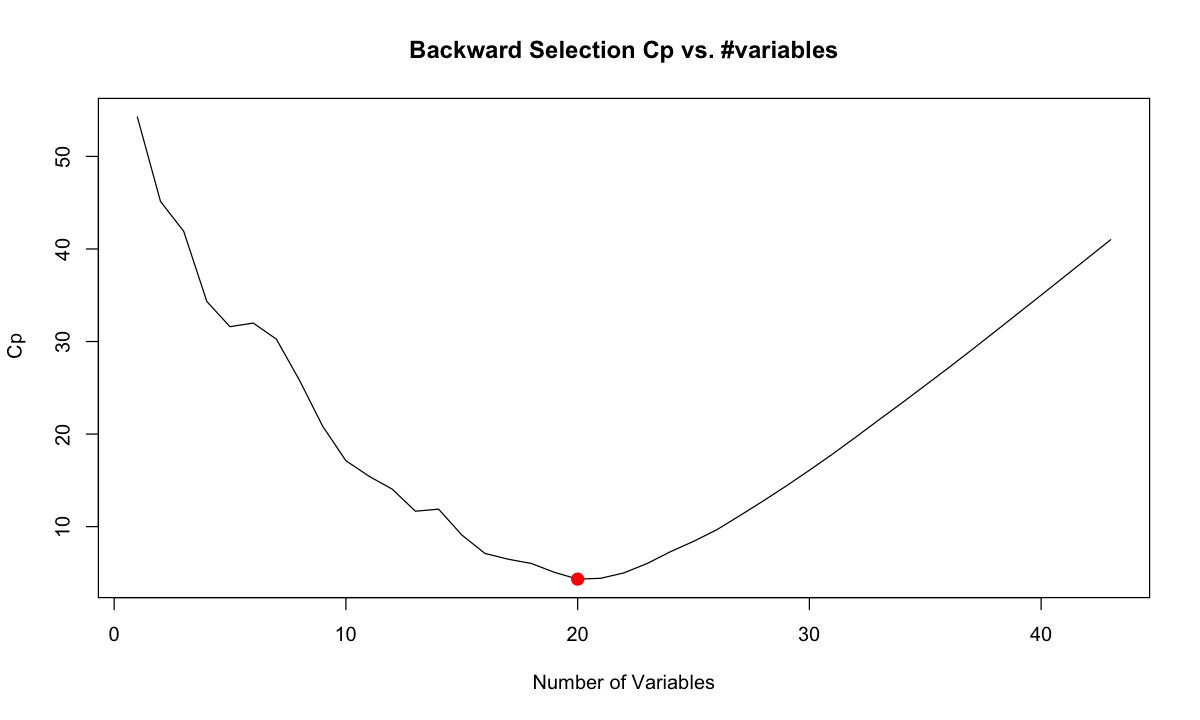

In [70]:
plot(
    bwd_summary$cp ,
    xlab =" Number of Variables ", 
    ylab =" Cp",
    type="l",
    main = "Backward Selection Cp vs. #variables")
points (20, bwd_summary$cp [20] , col ="red", cex =2, pch =20)

In [71]:
cat('Selection # with minimum C_p:', which.min(bwd_summary$cp))

Selection # with minimum C_p: 20

In [72]:
bwd_summary

Subset selection object
Call: regsubsets.formula(x = TARGET_price_nextday ~ ., data = training_eth, 
    nvmax = 49, method = "backward", )
46 Variables  (and intercept)
                            Forced in Forced out
reddit_index                    FALSE      FALSE
block_size                      FALSE      FALSE
mining_difficulty               FALSE      FALSE
ethe_open_interest              FALSE      FALSE
activate_address                FALSE      FALSE
on_chain_transaction_vol        FALSE      FALSE
unit_computing_income           FALSE      FALSE
daily_block_reward              FALSE      FALSE
block_gen_rate                  FALSE      FALSE
price                           FALSE      FALSE
open_interest_top100            FALSE      FALSE
open_interest_top50             FALSE      FALSE
open_interest_top30             FALSE      FALSE
open_interest_top10             FALSE      FALSE
avg_gas_cost                    FALSE      FALSE
unit_transaction_fee            FALSE      FAL

In [81]:
lm_bwd <- lm(
    formula = TARGET_price_nextday ~
        mining_difficulty + ethe_open_interest + activate_address + unit_computing_income +
        daily_block_reward + price + open_interest_top100 + open_interest_top30 + 
        avg_gas_cost + mining_vol + margin_call_l + margin_call_x + new_addresses + 
        outflow_retail + daily_uncle_block_reward + trade_vol_m + short + block_count +
        supply + reddit_follower_growth_rate, 
    data = training_eth)

tidy(lm_bwd, conf.int = TRUE) %>% head(3)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-9.200109e+03,3.213198e+03,-2.863225,0.004452937,-1.552029e+04,-2.879925e+03
mining_difficulty,8.314263e-14,2.547768e-14,3.263352,0.001212478,3.302943e-14,1.332558e-13
ethe_open_interest,-1.121087e-04,4.293639e-05,-2.611041,0.009425335,-1.965622e-04,-2.765513e-05


In [86]:
lm_bwd_pred <- predict(lm_bwd, testing_eth)

#### 4. LASSO

In [94]:
TARGET_price_nextday <- training_eth$TARGET_price_nextday
x_vars <- model.matrix(object = TARGET_price_nextday~.,
                      data = training_eth)[,-1]
head(x_vars, 1)

,reddit_index,block_size,mining_difficulty,ethe_open_interest,activate_address,on_chain_transaction_vol,unit_computing_income,daily_block_reward,block_gen_rate,price,⋯,trade_vol_l,trade_vol_x,short,long,ethe_otc_premium,block_count,avg_computing_power,transaction_vol,supply,reddit_follower_growth_rate
1,361.0267,48464.5,6.872911e+15,3168758,977746,2162809,0.0831,45796295,13.3,2248.548,⋯,88545324,28374121,4249099489,3983579316,-0.01069748,6500,5.414715e+14,1389025,112760511,2.406888


In [17]:
eth_cv_lambda_lasso <- cv.glmnet(
    x = x_vars,
    y = TARGET_price_nextday,
    alpha = 1
)
head(tidy(eth_cv_lambda_lasso))
tail(tidy(eth_cv_lambda_lasso))
eth_cv_lambda_lasso$lambda.min
which.min(eth_cv_lambda_lasso$lambda)
eth_cv_lambda_lasso$lambda
eth_cv_lambda_lasso$std.error
plot(eth_cv_lambda_lasso)

ERROR: Error in nrow(x): object 'x_vars' not found


In [104]:
tidy(eth_cv_lambda_lasso)[76,]

lambda,estimate,std.error,conf.low,conf.high,nzero
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
NA,NA,NA,NA,NA,NA


In [105]:
lasso_pred <- predict(eth_cv_lambda_lasso, 
                      newx = as.matrix(testing_eth %>% select(-TARGET_price_nextday)))

In [111]:
model_rmse <- tibble(
    Model = c('Full OLS', 'Forward selection', 'Backward selection', 'LASSO'),
    R_MSE = c(rmse(preds = full_add_pred, 
                   actuals = testing_eth$TARGET_price_nextday), 
             rmse(preds = lm_fwd_pred, 
                 actuals = testing_eth$TARGET_price_nextday), 
             rmse(preds = lm_bwd_pred, 
                 actuals = testing_eth$TARGET_price_nextday),
             rmse(preds = lasso_pred, 
                 actuals = testing_eth$TARGET_price_nextday))
)

model_rmse

Model,R_MSE
<chr>,<dbl>
Full OLS,138.4990
Forward selection,144.2862
Backward selection,138.0076
LASSO,138.7164


### Model diagnostics
Before we continue to our evaluation, it is necessary to consider if the assumptions of linear regression models are satisfied in our sample. 

> Assumptions for linear regression model:
> 1. Linear relation
> 2. Errors are independent and identically distributed
> 3. Conditional distribution of the error terms is normal
> 4. Input variables are independent

Notice that a number of input variables in our sample are dependent to each other. We have one close-to-hand example with the margin call statistics.

In [21]:
# margin call statistics in the ETH dataset
eth %>% 
    select(margin_call_s, margin_call_m, margin_call_l, margin_call_x, short_margin_call, long_margin_call) %>%
    head(3)

,margin_call_s,margin_call_m,margin_call_l,margin_call_x,short_margin_call,long_margin_call
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,185147.0,0.0,0.00,0,185147.0,0.0
2,410442.8,822655.7,107496.96,0,1028655.5,311940.0
3,342877.3,508929.5,63755.65,0,578336.1,337226.3


This group of input variables have `margin_call_s`, `margin_call_m`, `margin_call_l` and `margin_call_x` that corresponds to the small, medium, large and extra large sized margin calls, and `short_margin_call`, `long_margin_call` that defines margin calls in different lengths. 

Notice the dependence relation that 

$$\text{margin_call_s}+\text{margin_call_m}+\text{margin_call_l}+\text{margin_call_x}=\text{short_margin_call}+\text{long_margin_call}$$

Therefore, if these 6 input variables appear in one model, we would either remove the entire left-hand-side, or the entire right-hand-side of the equality above to avoid collinearity.

## Reference

Nakamoto, S. (2009). Bitcoin: A peer-to-peer electronic cash system. Retrieved from https://bitcoin.org/bitcoin.pdf.

Buterin, V. (n.d.). Ethereum whitepaper. Retrieved from https://ethereum.org/en/whitepaper/. 